# Problem Set #3

## Problem 1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
numb = 50000

### 1 - (a)

In [34]:
def func(x):
    return np.sin(x**4)

def trapezoidal(a,b,n):
    h = (b-a)/n
    hap = 0.5*(func(a)+func(b))
    for i in range(1,n):
        hap = hap + func(a+i*h)
    return h*hap


ans = trapezoidal(0, 4, numb)
print("the composite trapezoidal rule's result is {:.8f}".format(ans))

the composite trapezoidal rule's result is 0.34703207


### 1 - (b)

In [35]:
# 교수님 코드
def func(x):
    return np.sin(x**4)

def Simpson(a, b, n):
    h = (b-a)/n
    x = a
    hap = func(a)+func(b)
    for i in range(1, n-1, 2):
        x = x + h
        hap = hap + 4*func(x)
        x = x + h
        hap = hap + 2*func(x)
        
    hap = hap + 4*func(x+h)
    return hap * h/3


ans = trapezoidal(0, 4, numb)
print("the composite Simpson's rule's result is {:.8f}".format(ans))

the composite Simpson's rule's result is 0.34703207


### 1 - (c)

In [36]:
def GaussianQuadrature(a, b, deg, func):
    t, w = np.polynomial.legendre.leggauss(deg)
    
    x = (b + a + t*(b - a))*0.5               #르장드르 쓰기 위해 구간 바꾸기
    hap = 0
    for i in range(deg):
        hap = hap+ func(x[i])*w[i]
        
    hap = hap * (b - a)*0.5
    return hap


def func(x):
    return np.sin(x**4)

a = 0
b = 4
n = 5000

ans = GaussianQuadrature(a, b, n, func)
print("the GaussianQuadrature's result is {:.8f}".format(ans))    


the GaussianQuadrature's result is 0.34703207


## Problem 2

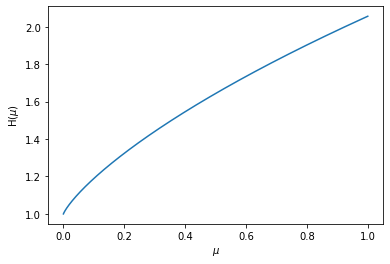

In [37]:
def func(x, mu):
    if x == 0:
        return 0
    a = x*np.arctan(mu*np.tan(x))
    b = 1 - x/np.tan(x)
    return a/b

def Simpson(a, b, n, mu):
    h = (b-a)/n
    x = a
    hap = func(a, mu)+func(b, mu)
    for i in range(1, n-1, 2):
        x = x + h
        hap = hap + 4*func(x, mu)
        x = x + h
        hap = hap + 2*func(x, mu)
        
    hap = hap + 4*func(x+h, mu)
    return hap * h/3


def H(mu):
    k = (1/(1+mu)) * np.exp(1/np.pi *Simpson(0, np.pi/2, 10000, mu))
    return k

t= np.linspace(0, 1, 10000)

plt.xlabel('$\mu$')
plt.ylabel('H($\mu$)')
plt.plot(t, H(t))
    
    
    

## Problem 3

In [38]:
xdata = [0, 0.6, 1.5, 1.7, 2.2, 2.3, 2.8, 3.1, 4]
ydata = [-0.8, -0.34, 0.59, 0.23, 0.1, 0.28, 1.03, 1.44, 0.74]

,x,piecewise expected value,polynomial expected value,natural spline expected value,clamped spline expected value,B spline expected value
0,1.0,0.073333,0.139564,0.3575561562248539,0.37503868800654083,0.418337
1,2.0,0.152000,-0.077582,-0.05275568575065319,-0.05272511742457281,-0.051432
2,3.5,1.128889,5.227338,1.4160211573042452,1.22897961901076,1.682334


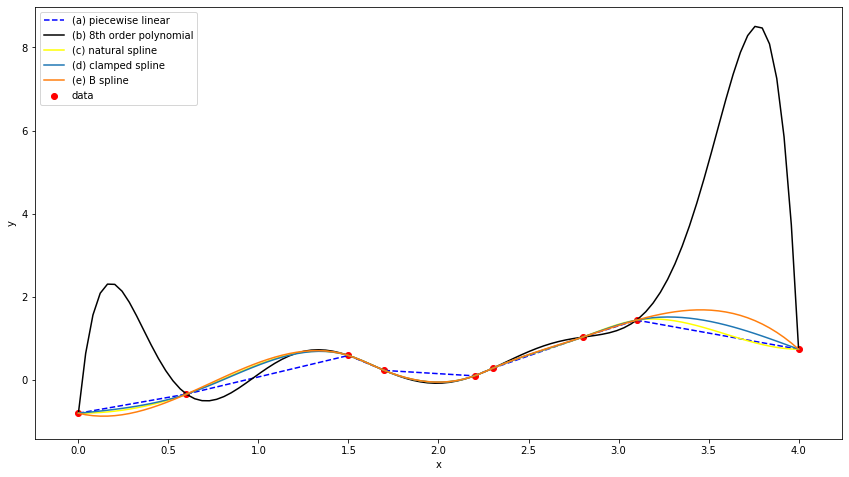

In [39]:
from scipy import interpolate


def piecewise_linear(x, i):
    x1 = xdata[i]
    y1 = ydata[i]
    x2 = xdata[i+1]
    y2 = ydata[i+1]
    return y1 + (y2-y1)*(x-x1)/(x2-x1)

def lagpol(x, y, deg):
    p = np.polyfit(x, y, deg)    

    poly = np.poly1d(p)         
    
    return poly




# ========================================================
for i in range(np.size(xdata)-1):
    if i == 0:
        x = np.linspace(xdata[i], xdata[i+1], 100)
        plt.plot(x, piecewise_linear(x, i), '--', color = 'blue', label = '(a) piecewise linear')
    else:
        x = np.linspace(xdata[i], xdata[i+1], 100)
        plt.plot(x, piecewise_linear(x, i), '--', color = 'blue')

        
x1 = np.linspace(0, 4, 100)
deg = 8
plt.plot(x1, lagpol(xdata, ydata, deg)(x1), label = '(b) 8th order polynomial', color = 'black')



result2 = interpolate.CubicSpline(xdata, ydata, bc_type = 'clamped')
result3 = interpolate.CubicSpline(xdata, ydata, bc_type = 'natural')
plt.plot(x1, result2(x1), label = '(c) natural spline', color = 'yellow')
plt.plot(x1, result3(x1), label = '(d) clamped spline')


tck = interpolate.splrep(xdata,ydata,s=0)
ynew = interpolate.splev(x1,tck,der=0)
plt.plot(x1,ynew, label = '(e) B spline')


plt.scatter(xdata,ydata, label = 'data', color = 'red')

# ====================================================
    
t = [1, 2, 3.5]
tr1 = [0, 0, 0]
tr1[0] = piecewise_linear(t[0], 1)
tr1[1] = piecewise_linear(t[1], 3)
tr1[2] = piecewise_linear(t[2], 7)

tr2 = [0, 0, 0]
for i in range(np.size(t)):
    tr2[i] = lagpol(xdata, ydata, deg)(t[i])
    
tr3 = [0,0,0]
for i in range(np.size(t)):
    tr3[i] = result2(t[i])
    
tr4 = [0,0,0]
for i in range(np.size(t)):
    tr4[i] = result3(t[i])
    
for i in range(np.size(t)):
    tr5 =interpolate.splev(t,tck,der=0)
    
#===============================================================
plt.xlabel('x')
plt.ylabel('y')
plt.subplots_adjust(left=0.08, right=1.95, top=1.6, bottom=0.1, wspace=0.25,hspace=0.45)
plt.legend()

table1 = pd.DataFrame(t, columns=['x'])
table1['piecewise expected value'] = tr1
table1['polynomial expected value'] = tr2
table1['natural spline expected value'] = tr4
table1['clamped spline expected value'] = tr3
table1['B spline expected value'] = tr5
table1

## Problem 4

In [40]:
from scipy.odr import *

### 4 - (a)

Beta: [-3.95085978  5.36449855]
Beta Std Error: [1.18930851 0.53193191]
Beta Covariance: [[105.91343686 -47.27150679]
 [-47.27150679  21.18722599]]
Residual Variance: 0.01335481847952543
Inverse Condition #: 0.0027811945433923644
Reason(s) for Halting:
  Sum of squares convergence



a is -3.951, b is 5.364 and error sd is [1.18930851 0.53193191] chisq is 0.868
error sd of a is 1.189 and error sd of b is 0.532
chisq is 0.868


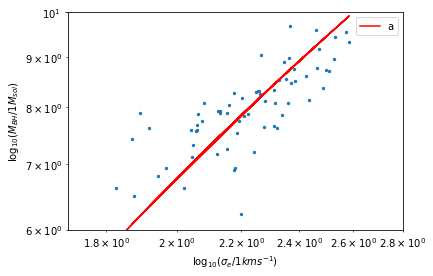

In [41]:
fn = 'BlackHall.txt'
mass, measure_err, sigma, del_sigma = np.loadtxt(fn,unpack=True,usecols=[0,1,2,3])


def linear_func(p, x): 
    return p[0]+p[1]*x

line_model = Model(linear_func)

data1 = RealData(np.log10(sigma), np.log10(mass))

odr1 = ODR(data1, line_model, beta0 = [0, 1])
out1 = odr1.run()
out1.pprint()

coeff1 =out1.beta


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\log_{10}(\sigma_{e}/1kms^{-1})$', size = 10)
plt.ylabel(r'$\log_{10}(M_{BH}/1M_{sol})$', size = 10)
sigmalog = np.log10(sigma)
masslog = np.log10(mass)
plt.scatter(sigmalog, masslog,s = 5.5)
plt.xlim(1.7, 2.8)
plt.ylim(6, 10)
plt.plot(sigmalog, coeff1[0]+coeff1[1]*sigmalog, label = 'a', color = 'red')
plt.legend()

sd1 = out1.sd_beta
chisq1 = out1.sum_square
print("\n\n")
print("a is {:.3f}, b is {:.3f} and error sd is {} chisq is {:.3f}".format(coeff1[0], coeff1[1], sd1, chisq1))
print("error sd of a is {:.3f} and error sd of b is {:.3f}".format(sd1[0], sd1[1]))
print("chisq is {:.3f}".format(chisq1))

### 4 - (b)

Beta: [-2.3397288   4.70367267]
Beta Std Error: [0.98627097 0.45017205]
Beta Covariance: [[ 0.04820329 -0.02193875]
 [-0.02193875  0.01004249]]
Residual Variance: 20.179753150752227
Inverse Condition #: 0.003314649510924227
Reason(s) for Halting:
  Sum of squares convergence



a is -2.340, b is 4.704 and error sd is [0.98627097 0.45017205] chisq is 1311.684
error sd of a is 0.986 and error sd of b is 0.450
chisq is 1311.684


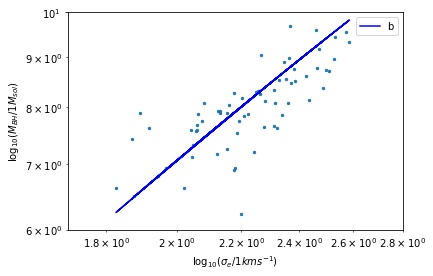

In [42]:
fn = 'BlackHall.txt'
mass, measure_err, sigma, del_sigma = np.loadtxt(fn,unpack=True,usecols=[0,1,2,3])


def linear_func(p, x): 
    return p[0]+p[1]*x

line_model = Model(linear_func)

# log scale error의 전파
x_error = del_sigma/(np.log(10)*sigma)
y_error = measure_err/(np.log(10)*mass)


data2 = RealData(np.log10(sigma), np.log10(mass), sx = x_error,sy=y_error)

odr2 = ODR(data2, line_model, beta0 = [0, 1])
out2 = odr2.run()
out2.pprint()
coeff2 = out2.beta


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\log_{10}(\sigma_{e}/1kms^{-1})$', size = 10)
plt.ylabel(r'$\log_{10}(M_{BH}/1M_{sol})$', size = 10)
sigmalog = np.log10(sigma)
masslog = np.log10(mass)
plt.scatter(sigmalog, masslog,s = 5.5)
plt.xlim(1.7, 2.8)
plt.ylim(6, 10)
plt.plot(sigmalog, coeff2[0]+coeff2[1]*sigmalog, label = 'b', color = 'blue')
plt.legend()

sd2 = out2.sd_beta
chisq2 = out2.sum_square
print("\n\n")
print("a is {:.3f}, b is {:.3f} and error sd is {} chisq is {:.3f}".format(coeff2[0], coeff2[1], sd2, chisq2))
print("error sd of a is {:.3f} and error sd of b is {:.3f}".format(sd2[0], sd2[1]))
print("chisq is {:.3f}".format(chisq2))

### 4 - (c)

In [11]:
t = np.linspace(1.5, 3, 1000) 

(6, 10)

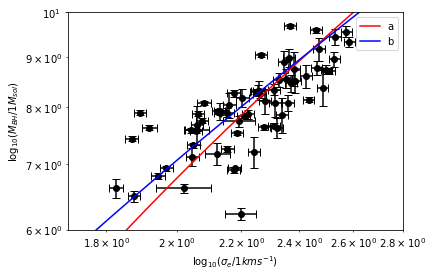

In [18]:
sigmalog = np.log10(sigma)
masslog= np.log10(mass)

plt.scatter(sigmalog, masslog, color = 'black')
plt.errorbar(sigmalog ,masslog,yerr = measure_err/(np.log(10)*mass), linestyle='None', capsize=4, color = 'black')
plt.errorbar(sigmalog, masslog, xerr = del_sigma/(sigma*np.log(10)), linestyle='None', capsize=4, color = 'black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\log_{10}(\sigma_{e}/1kms^{-1})$', size = 10)
plt.ylabel(r'$\log_{10}(M_{BH}/1M_{sol})$', size = 10)
plt.plot(t, coeff1[0]+coeff1[1]*t, label ='a', color = 'red')
plt.plot(t, coeff2[0] + coeff2[1]*t, label = 'b', color = 'blue')
plt.legend()

plt.xlim(1.7, 2.8)
plt.ylim(6, 10)

### 4 -(d)

$\log_{10}(\sigma_{e}/1kms^{-1}) = c + d \log_{10}(M_{BH}/1M_{sol}) $을 변형하면 <br>
$ \log_{10}(M_{BH}/1M_{sol}) = \frac{1}{d}\log_{10}(\sigma_{e}/1kms^{-1}) - \frac{c}{d} $ <br>
$= a + b \log_{10}(\sigma_{e}/1kms^{-1})$  <br>
$ \therefore a = \frac{-c}{d}, b = \frac{1}{d} $ <br>
이를 확인해보면 그 결과는 아래와 같다. 
 

In [46]:
fn = 'BlackHall.txt'
mass, measure_err, sigma, del_sigma = np.loadtxt(fn,unpack=True,usecols=[0,1,2,3])


def linear_func(p, x): 
    return p[0]+p[1]*x

line_model = Model(linear_func)

data3 = RealData(np.log10(mass), np.log10(sigma), \
                 sx =measure_err/(np.log(10)*mass) ,\
                                 sy= del_sigma/(np.log(10)*sigma))
odr3 = ODR(data3, line_model, beta0 = [0, 1])
out3 = odr3.run()
out3.pprint()
coeff3 = out3.beta
sd3 = out3.sd_beta
chisq3 = out3.sum_square

print("\n\n")
print("c is {:.3f}, d is {:.3f} and error sd is {} chisq is {:.3f}".format(coeff3[0], coeff3[1], sd3, chisq3))
print("error sd of c is {:.3f} and error sd of d is {:.3f}".format(sd3[0], sd3[1]))
print("chisq is {:.3f}".format(chisq3))

Beta: [0.49738718 0.21260476]
Beta Std Error: [0.16225355 0.02034756]
Beta Covariance: [[ 1.30458554e-03 -1.62818514e-04]
 [-1.62818514e-04  2.05167564e-05]]
Residual Variance: 20.179753136850934
Inverse Condition #: 0.001212779254091
Reason(s) for Halting:
  Sum of squares convergence



c is 0.497, d is 0.213 and error sd is [0.16225355 0.02034756] chisq is 1311.684
error sd of c is 0.162 and error sd of d is 0.020
chisq is 1311.684


In [45]:
print('a = {:.3f}, -c/d = {:.3f}'.format(coeff2[0], -coeff3[0]/coeff3[1]))
print('b ={:.3f}, 1/d={:.3f}'.format(coeff2[1], 1/coeff3[1]))

a = -2.340, -c/d = -2.339
b =4.704, 1/d=4.704


위와 같은 계산을 통해 두 값이 같음을 확인할 수 있었다. 

## Problem 5

### 5 - (a)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

fn = 'hw3p5.dat'
x, y = np.loadtxt(fn,unpack=True,usecols=[0,1])
t = np.linspace(-5, 25, 1000)


Beta: [2.24596933 1.2100246  9.85323056 3.26830178]
Beta Std Error: [0.03225676 0.04023557 0.10167462 0.15083983]
Beta Covariance: [[ 2.65105140e-02 -2.05543972e-02  3.24348320e-05 -9.17719392e-02]
 [-2.05543972e-02  4.12474308e-02  6.12193034e-03  2.47631463e-02]
 [ 3.24348320e-05  6.12193034e-03  2.63391463e-01 -1.94030803e-02]
 [-9.17719392e-02  2.47631463e-02 -1.94030803e-02  5.79707145e-01]]
Residual Variance: 0.03924853139489031
Inverse Condition #: 0.020759702776818323
Reason(s) for Halting:
  Sum of squares convergence


p[0] : 2.2460    error of p[0] : 0.0323
p[1] : 1.2100    error of p[1] : 0.0402
p[2] : 9.8532    error of p[2] : 0.1017
p[3] : 3.2683    error of p[3] : 0.1508
chisq : 7.6927


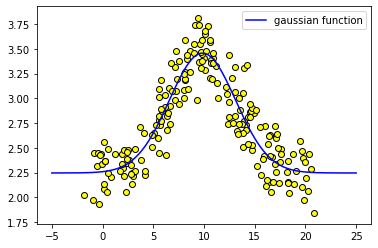

In [29]:
def gauss_func(p, x):
    xc = x - p[2]
    sig2 = p[3] **2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

model = Model(gauss_func)
data = RealData(x,y)
odr=ODR(data, model, beta0=[5,5,10,1])

out=odr.run()
out.pprint()
coeff = out.beta
error5 = out.sd_beta
chisq1 = out.sum_square

plt.scatter(x, y, color='yellow', edgecolor = 'black')
plt.plot(t, gauss_func(coeff, t), 'blue', label = 'gaussian function')
plt.legend()

print('\n')
for i in range(len(coeff)):
    print('p[{:.0f}] : {:.4f}    error of p[{:.0f}] : {:.4f}'.format(i, coeff[i], i, error5[i]))
print('chisq : {:.4f}'.format(chisq1))
plt.show()



### 5-(b)

Beta: [ 1.98483148 28.60677016 19.05789567  9.81598476]
Beta Std Error: [0.0584236  4.76728161 2.74740904 0.10289015]
Beta Covariance: [[ 8.68758388e-02 -6.64910035e+00 -3.55659056e+00 -2.23439067e-03]
 [-6.64910035e+00  5.78447637e+02  3.26811367e+02  1.17504326e-02]
 [-3.55659056e+00  3.26811367e+02  1.92118454e+02 -8.16477715e-02]
 [-2.23439067e-03  1.17504326e-02 -8.16477715e-02  2.69444940e-01]]
Residual Variance: 0.03928959598967809
Inverse Condition #: 0.0025838590950386666
Reason(s) for Halting:
  Sum of squares convergence


q[0] : 1.9848    error of q[0] : 0.0584
q[1] : 28.6068    error of q[1] : 4.7673
q[2] : 19.0579    error of q[2] : 2.7474
q[3] : 9.8160    error of q[3] : 0.1029
chisq : 7.7008


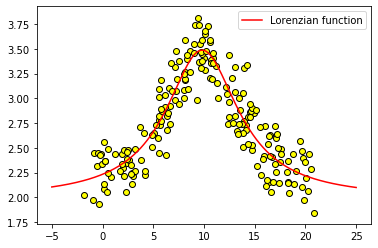

In [31]:
def lorentz_func(q, x):
    return q[0]+q[1]/(q[2]+(x-q[3])**2)

model = Model(lorentz_func)
data = RealData(x,y)
odr2=ODR(data, model, beta0=[5,5,10,1])

out2=odr2.run()
out2.pprint()
coeff2 = out2.beta
error2 = out2.sd_beta
chisq2 = out2.sum_square

plt.scatter(x, y, color='yellow', edgecolor = 'black')
plt.plot(t, lorentz_func(coeff2, t), 'red', label = 'Lorenzian function')
plt.legend()

print('\n')
for i in range(len(coeff2)):
    print('q[{:.0f}] : {:.4f}    error of q[{:.0f}] : {:.4f}'.format(i, coeff2[i], i, error2[i]))
print('chisq : {:.4f}'.format(chisq2))

plt.show()



### 5 - (c)

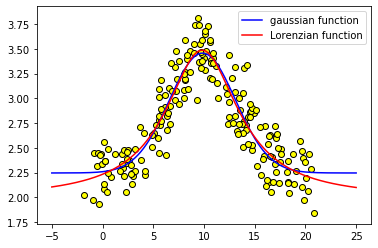

chi_square value of gaussian is 7.693
chi_square value of lorentzian is 7.701


In [6]:
plt.scatter(x, y, color='yellow', edgecolor = 'black')
plt.plot(t, gauss_func(coeff, t), 'blue', label = 'gaussian function')
plt.plot(t, lorentz_func(coeff2, t), 'red', label = 'Lorenzian function')
plt.legend()
plt.show()

print("chi_square value of gaussian is {:.3f}".format(chisq1))
print("chi_square value of lorentzian is {:.3f}".format(chisq2))

gaussian (a) 과 lorentzian (b) 의 $\chi^{2}$의 값을 비교해보면 gaussian의 경우가 미세하게 더 작으므로 gaussian (a) 가 더 좋은 결과를 준다는 것을 알 수 있다. 
단, 그 차이가 너무 작아 이에 대해 명확한 판단이라고 단정짓기 어려울 수 있다. 